This notebook uses a random sample of Hull postcodes to show how collecting this data from visitors to Hull museums can provide insight into from where people visit.
Graphs can clearly show any gaps for particular postcode areas and these areas could be targeted with advertising or with outreach activities to encourage people from these areas to visit.

In [10]:
# Import modules needed
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
# Create the pandas dataframe and store the postcodes in a list
postcodes_df = pd.read_csv('visitor_postcodes.csv')
print(postcodes_df.head())
postcodes = list(postcodes_df['postcode'])
print(postcodes[0])

   index postcode
0      0  HU6 7SF
1      1  HU6 7JJ
2      2  HU3 5DD
3      3  HU2 0PS
4      4  HU3 6LY
HU6 7SF


First let's make a chart that plots the number of visitors form the different first halves of the visitor postcodes. E.g. HU1, HU2, HU3, ... up to HUxx.
Let's see which postcode first halves we have in our data

In [12]:
# Get all the different first halves of the postcodes from our data
postcode_first_half = []
for i in range(len(postcodes)): #len(postcodes)
    first_half = postcodes[i].split(' ')[0]
    #print(first_half)
    if first_half in postcode_first_half:
        continue
    else:
        postcode_first_half.append(first_half)
postcode_first_half.sort()
print(postcode_first_half)

    

['HU1', 'HU11', 'HU12', 'HU13', 'HU15', 'HU16', 'HU18', 'HU2', 'HU20', 'HU3', 'HU4', 'HU5', 'HU6', 'HU7', 'HU8', 'HU9']


This isn't all the postcodes that exist in the area. Since we want to find out where the fewest visitors come from, it would be useful to show these on our graph.
The full list goes from HU1 through to HU20 with no gaps in the numbers. The map below shows which area each postcode covers.


![Image of Postcodes in Hull](https://www.gbmaps.com/4-digit-postcode-maps/hu-hull-postcode-district-map.gif)

In [13]:
postcode_first_half_all = ['HU1', 'HU2', 'HU3', 'HU4', 'HU5', 'HU6', 'HU7', 'HU8', 'HU9', 'HU10', 'HU11', 'HU12', 'HU13', 'HU14', 'HU15','HU16', 'HU17', 'HU18', 'HU19', 'HU20']

To create a bar graph we need to count how many times each of these postcode beginnings appears in our data. 

In [14]:
# Create a list to store the postcode counts
counts =[0]*20

# Loop through the data and add to the counts when we find a match
for postcode in postcodes:
    for i in range(len(postcode_first_half_all)):
        if postcode_first_half_all[i] in postcode:
            counts[i] += 1
            
print(counts)
    

[28, 8, 37, 15, 26, 29, 30, 27, 46, 0, 3, 1, 1, 0, 1, 1, 0, 1, 0, 1]


We now have the basic data to create a bar chart.

Text(0.5, 1.0, 'A bar chart to show the number of visitors from each of the Hull postcode areas.')

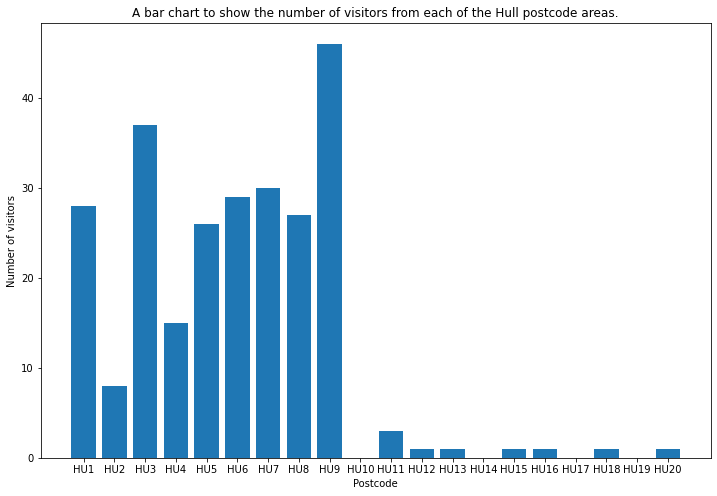

In [30]:
# Plot the data from the lists
fig = plt.figure(figsize=(12,8))
plt.bar(postcode_first_half_all, counts)
plt.xlabel('Postcode')
plt.ylabel('Number of visitors')
plt.title('A bar chart to show the number of visitors from each of the Hull postcode areas.')



Using the bar chart and the map above we can see that most of the visitors in our imaginary sample come from the areas nearest to the city centre. The exception to this is HU2, which is close to the city centre but provides few visitors. Looking at the map, though, we can see that it is a small area and could perhaps be a primarily commercial or industrial area. However it is clear that the more rural areas outside the city borders are poorly represented and could be targeted with promotional material and outreach activities.